In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
import requests
import urllib.request, urllib.parse, urllib.error
import json
import sqlite3
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

### CSV Data

In [3]:
CSV_df=pd.read_csv("netflix_titles.csv")#read the csv
CSV_df.head()#look at the first few rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
CSV_df.shape #looking at the size of the file

(6234, 12)

In [5]:
CSV_df.dtypes #looking at the data types for each columns

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
CSV_df.isnull().sum() #looking to see the count of NAN in each column

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Looks like Director has the missing values, then followed by cast, country,date added, and rating. Since Type didn't have any missing values, now going to investigate the overall content type on Netflix.

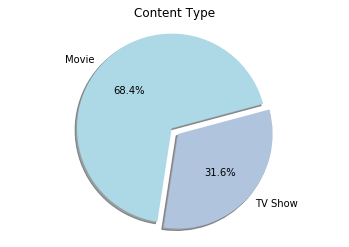

In [7]:
Types = CSV_df['type'].value_counts()#choosing the data in the type column to graph
my_labels = 'Movie','TV Show'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.09)
plt.pie(Types,labels=my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Content Type')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

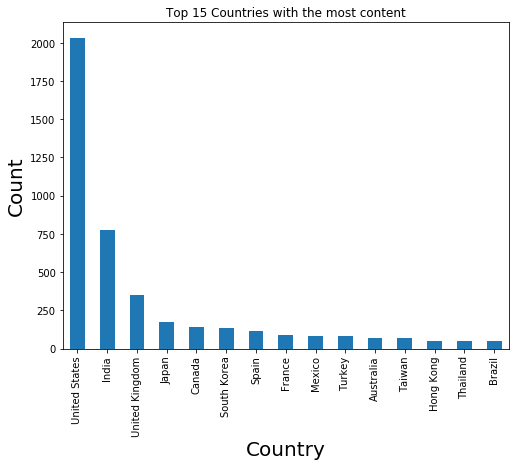

In [8]:
#Now going to investigate which are the countries with the most content offerings
country=CSV_df['country'].value_counts()
top15_contries=country[:15]#narrowing down to the top 15
country_plot = top15_contries.plot.bar(title='Top 15 Countries with the most content', figsize=(8,6))
country_plot.set_xlabel('Country',size=20)
country_plot.set_ylabel('Count',size=20)

Looks like United States, India, and United Kingdom has the most content offerings

Now going to drill down the data to 2018 because the webpage I found has gross sells from 2018 box office movies and would like to link up with my Netflix data .

In [9]:
CSV_df_2018=CSV_df.loc[CSV_df['release_year']==2018]#filtering the dataset to 2018 content
CSV_df_2018.shape #checking to see how many rows and columns

(1063, 12)

In [10]:
CSV_df_2018.head()#looking at the first few columns

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,80203094,Movie,City of Joy,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...
28,80190843,TV Show,First and Last,NaN,NaN,NaN,"September 7, 2018",2018,TV-MA,1 Season,Docuseries,Take an intimate look at the emotionally charg...
30,80988892,Movie,Next Gen,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...
31,80239639,Movie,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,"September 7, 2018",2018,PG-13,106 min,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...
32,80159586,Movie,The Most Assassinated Woman in the World,Franck Ribière,"Anna Mouglalis, Niels Schneider, André Wilms, ...","Belgium, United Kingdom, United States","September 7, 2018",2018,TV-MA,102 min,"Dramas, International Movies, Thrillers","In 1930s Paris, an actress famous for her gory..."


In [11]:
CSV_df_2018.isnull().sum() #looking to see the count of NAN in each column

show_id           0
type              0
title             0
director        418
cast            123
country         109
date_added        1
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

I am not concerned with the missing data from the columns listed above because I will link up my data thats needed for further analysis by using the title. However, I do want to see which row is missing the date added, and would need to see if thats a movie title.

In [12]:
CSV_missing_date = CSV_df_2018[CSV_df_2018['date_added'].isnull()]#filtering down to that row with the missing date added
CSV_missing_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


Since the row with the missing row was a TV show, I am not concerned removing it. However, now I am going to drill down to just movies in United States.

In [13]:
CSV_df_2018_mov=CSV_df_2018.loc[CSV_df_2018['type']=='Movie']#filtering the dataset to 2018 movie content
CSV_df_2018_mov.shape #checking to see how many rows and columns

(646, 12)

In [14]:
#now going to only select the rows where country is not NAN
CSV_df_2018_mov=CSV_df_2018_mov[CSV_df_2018_mov['country'].notnull()]
CSV_df_2018_mov.shape #checking to see how many rows and columns

(594, 12)

In [15]:
#filtering the dataset to 2018 movies content being offered in the United States
CSV_df_2018_mov_us=CSV_df_2018_mov[CSV_df_2018_mov['country'].str.contains("United States")]
CSV_df_2018_mov_us.shape #checking to see how many rows and columns

(267, 12)

In [16]:
#using binary expression to say if the Title column has duplicates
print("Title is duplictaed - {}".format(any(CSV_df_2018_mov_us.title.duplicated())))

Title is duplictaed - False


In [17]:
CSV_df_2018_mov_us.isnull().sum() #looking to see the count of NAN in each column

show_id          0
type             0
title            0
director        10
cast            38
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Looks like only director and cast are the only columns left with missing values, but I am okay with that beacause it won't cause any issues going forward with my analysis with the webpage.

### Website Data

In [18]:
web_page = requests.get('https://www.boxofficemojo.com/year/2018/?sort=gross&grossesOption=totalGrosses').text #Reading the website data
read_url = BeautifulSoup(web_page, 'lxml') #Importing url into beautiful soup for processing
print(type(read_url))

<class 'bs4.BeautifulSoup'>


In [19]:
Movie_table = read_url.find("table") #Grabbing the table from the website

In [20]:
Movie_Rows = Movie_table.findAll('tr') #Locating all the table row tags
print(len(Movie_Rows)) #Printing the length of movie rows

879


In [21]:
Movies = [] #Initializing empty list
for i in range(len(Movie_Rows)): #Cycling through each of the movie rows
    Movies.append([td.get_text().strip() for td in Movie_Rows[i].findAll('td')]) #appending table data to Movies list
print(Movies[1]) #printing out the first row of data

['1', 'Black Panther', '-', '-', '-', '$700,059,566', '4,084', '$202,003,951', '28.9%', '4,020', 'Feb 16', 'Aug 9', 'Walt Disney Studios Motion Pictures', 'false']


In [22]:
header = [th.getText().strip() for th in Movie_table.findAll('th')] #Getting list of headers for dataframe
print(header)

['Rank', 'Release', 'Genre', 'Budget', 'Running Time', 'Gross', 'Max Th', 'Opening', '% of Total', 'Open Th', 'Open', 'Close', 'Distributor', 'Estimated']


In [23]:
#creating the dataframe by using the information from new movie list and headers
website_data = pd.DataFrame(Movies,columns=header) 
website_data.head()#looking at the first few rows of the dataframe

,Rank,Release,Genre,Budget,Running Time,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Estimated
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,Black Panther,-,-,-,"$700,059,566","4,084","$202,003,951",28.9%,"4,020",Feb 16,Aug 9,Walt Disney Studios Motion Pictures,false
2,2,Avengers: Infinity War,-,-,-,"$678,815,482","4,474","$257,698,183",38%,"4,474",Apr 27,Sep 13,Walt Disney Studios Motion Pictures,false
3,3,Incredibles 2,-,-,-,"$608,581,744","4,410","$182,687,905",30%,"4,410",Jun 15,Dec 13,Walt Disney Studios Motion Pictures,false
4,4,Jurassic World: Fallen Kingdom,-,-,-,"$417,719,760","4,485","$148,024,610",35.4%,"4,475",Jun 22,Oct 4,Universal Pictures,false


In [24]:
#renaming website data release title to title to match csv data
website_data = website_data.rename(columns = {'Release': 'title', 'Max Th': 'Max Theatres', 'Open Th':'Open Theatres'})
website_data.head()

,Rank,title,Genre,Budget,Running Time,Gross,Max Theatres,Opening,% of Total,Open Theatres,Open,Close,Distributor,Estimated
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,Black Panther,-,-,-,"$700,059,566","4,084","$202,003,951",28.9%,"4,020",Feb 16,Aug 9,Walt Disney Studios Motion Pictures,false
2,2,Avengers: Infinity War,-,-,-,"$678,815,482","4,474","$257,698,183",38%,"4,474",Apr 27,Sep 13,Walt Disney Studios Motion Pictures,false
3,3,Incredibles 2,-,-,-,"$608,581,744","4,410","$182,687,905",30%,"4,410",Jun 15,Dec 13,Walt Disney Studios Motion Pictures,false
4,4,Jurassic World: Fallen Kingdom,-,-,-,"$417,719,760","4,485","$148,024,610",35.4%,"4,475",Jun 22,Oct 4,Universal Pictures,false


In [25]:
website_data.isnull().sum() #check to see if any values are null

Rank             1
title            1
Genre            1
Budget           1
Running Time     1
Gross            1
Max Theatres     1
Opening          1
% of Total       1
Open Theatres    1
Open             1
Close            1
Distributor      1
Estimated        1
dtype: int64

In [26]:
website_data.dropna(inplace=True) #Dropping N/A values
website_data.head()

,Rank,title,Genre,Budget,Running Time,Gross,Max Theatres,Opening,% of Total,Open Theatres,Open,Close,Distributor,Estimated
1,1,Black Panther,-,-,-,"$700,059,566","4,084","$202,003,951",28.9%,"4,020",Feb 16,Aug 9,Walt Disney Studios Motion Pictures,false
2,2,Avengers: Infinity War,-,-,-,"$678,815,482","4,474","$257,698,183",38%,"4,474",Apr 27,Sep 13,Walt Disney Studios Motion Pictures,false
3,3,Incredibles 2,-,-,-,"$608,581,744","4,410","$182,687,905",30%,"4,410",Jun 15,Dec 13,Walt Disney Studios Motion Pictures,false
4,4,Jurassic World: Fallen Kingdom,-,-,-,"$417,719,760","4,485","$148,024,610",35.4%,"4,475",Jun 22,Oct 4,Universal Pictures,false
5,5,Aquaman,-,-,-,"$335,061,807","4,184","$67,873,522",20.3%,"4,125",Dec 21,Apr 4,Warner Bros.,false


In [27]:
print("Title is duplictaed - {}".format(any(website_data.title.duplicated()))) #check to see if any titles are duplicated

Title is duplictaed - False


In [28]:
website_data.shape #checking columns and rows count for website data

(878, 14)

### API Data

In [29]:
#assigning the variables to construct the URL
Disha_key = '&apikey='+"3bd55297" #my key
url = "http://www.omdbapi.com/?" #the url

In [30]:
#list of movies I want to look up from my Netflix dataset from previous milestone total of 267 movies added in 2018
List_of_Movies=['City of Joy', 'Next Gen', 'Sierra Burgess Is A Loser', 'The Most Assassinated Woman in the World', 'Black Panther', 'The Debt Collector', 'Hold the Dark', 'Lessons from a School Shooting: Notes from Dunblane', 'The Hurricane Heist', 'A Wrinkle in Time', 'Under the Eiffel Tower', 'In Darkness', 'Quincy', 'Class Rank', 'We Have Always Lived in the Castle', 'The Angel', 'The Land of Steady Habits', 'Head Count', 'Time Trap', 'Reversing Roe', 'My Teacher, My Obsession', 'For the Birds', 'Delirium', 'Mo Amer: The Vagabond', 'Seven in Heaven', 'Private Life', '14 Cameras', 'Shirkers', 'Ronnie Coleman: The King', 'ADAM SANDLER 100% FRESH', 'Scorpion King 5: Book of Souls', 'يوم الدين', 'Salam - The First ****** Nobel Laureate', 'Gnome Alone', 'The Night Comes for Us', 'The Game Changers', "Ron White: If You Quit Listening, I'll Shut Up", 'Apostle', 'Feminists: What Were They Thinking?', 'ReMastered: Who Shot the Sheriff', 'The Kindergarten Teacher', '22-Jul', 'Tales From the Hood 2', 'My Little Pony Equestria Girls: Forgotten Friendship', 'My Little Pony Equestria Girls: Rollercoaster of Friendship', 'Outlaw King', 'Hope Springs Eternal', "John Leguizamo's Latin History for Morons", 'A Christmas Prince: The Royal Wedding', 'My Little Pony Friendship Is Magic: Best Gift Ever', 'The Christmas Chronicles', 'Puppy Star Christmas', 'Trevor Noah: Son of Patricia', 'ReMastered: Tricky Dick & The Man in Black', 'The Holiday Calendar', 'The Other Side of the Wind', 'They’ll Love Me When I’m Dead', 'Cam', 'The Ballad of Buster Scruggs', 'The Princess Switch', 'SunGanges', 'Holly Star', 'Edge of Fear', 'Bathtubs Over Broadway', 'Hari Kondabolu: Warn Your Relatives', 'Like Arrows', 'Family Blood', 'Pup Star: World Tour', 'Anon', 'End Game', 'The Nutcracker and the Four Realms', 'Ibiza', 'Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life', 'Tig Notaro Happy To Be Here', 'Her Only Choice', 'First Impression', 'Killer Cove', 'Weed the People', 'Ali Wong: Hard Knock Wife', 'The Kissing Booth', 'American Experience: The Island Murder', 'Darc', 'John Mulaney: Kid Gorgeous at Radio City', 'Tremors 6: A Cold Day in Hell', 'The Outsider', 'Nappily Ever After', 'Aliens Ate My Homework', 'Gad Elmaleh: American Dream', 'Christopher Robin', 'The Burial of Kojo', 'First Match', 'Happy Anniversary', 'The Titan', 'Game Over, Man!', 'Paradox', 'Roxanne Roxanne', 'A.X.L.', 'Weapon of Choice', 'Social Animals', "Tinker'", 'All About Nina', 'Benji', 'Take Your Pills', 'Late Life: The Chien-Ming Wang Story', 'Twinsanity', 'Stretch Armstrong: The Breakout', 'An Interview with God', 'Haunting on Fraternity Row', 'Paranormal Investigation', 'Adel Karam: Live from Beirut', 'Battle Drone', 'Alex Strangelove', 'The Push', "Dr. Seuss' The Grinch", 'Pierre Jackson', 'Recovery Boys', 'TAU', 'Spider-Man: Into the Spider-Verse', 'W. Kamau Bell: Private School Negro', 'Memory Games', 'Running for Grace', 'Big Kill', 'Bob Lazar: Area 51 & Flying Saucers', 'Set It Up', 'Ralph Breaks the Internet: Wreck-It Ralph 2', 'Bullitt County', 'Life in the Doghouse', 'Satan & Adam', 'Outside In', 'Mary Poppins Returns', 'The Legacy of a Whitetail Deer Hunter', 'White Fang', 'Extinction', 'The Bleeding Edge', '1st Summoning', 'Waterschool', 'Iliza Shlesinger: Elder Millennial', 'The Competition', 'D.L. Hughley: Contrarian', 'Demetri Martin: The Overthinker', 'Duck Duck Goose', 'Father of the Year', 'King of Peking', 'Iron Cowboy: The Story of the 50.50.50', 'We Belong Together', 'Love Shot', 'Stray Bullet', 'How It Ends', 'Jim Jefferies: This Is Me Now', 'Cities of Last Things', 'NOVA: Black Hole Apocalypse', 'NOVA: Decoding the Weather Machine', 'NOVA: First Face of America', 'NOVA: Prediction by the Numbers', 'NOVA: Thai Cave Rescue', 'NOVA: The Impossible Flight', 'Swiped', 'Duck Butter', 'The Feels', 'Solo: A Star Wars Story', 'Solo: A Star Wars Story (Spanish Version)', 'The Gentleman Driver', 'The Incredibles 2', 'Ant-Man and the Wasp', 'A Futile and Stupid Gesture', 'Hotel Transylvania 3: Summer Vacation', 'Todd Glass: Act Happy', 'Harith Iskander: I Told You So', 'Step Sisters', 'The Open House', 'Lady-Like', 'Driven to Dance', 'Katt Williams: Great America', 'Only Mine', 'The Devil We Know', 'Betty White: First Lady of Television', "He's Out There", 'The Polka King', 'Tom Segura: Disgraceful', 'Gone are the Days', 'God Bless the Broken Road', 'Seeing Allred', 'When We First Met', 'Incredibles 2 (Spanish Version)', 'Lez Bomb', 'The Cloverfield Paradox', 'Billy Graham: An Extraordinary Journey', 'Marlon Wayans: Woke-ish', 'All Light Will End', 'Studio 54', 'Irreplaceable You', 'Behind the Curve', 'Deadly Scholars', 'Never Heard', 'Chris Rock: Tamborine', 'Period. End of Sentence.', 'We the Animals', 'LEGO Marvel Super Heroes: Black Panther', 'Malicious', 'The Witch Files', "Dumplin'", 'Mowgli: Legend of the Jungle', 'The American Meme', "God's Not Dead: A Light in Darkness", 'The Bill Murray Stories: Life Lessons Learned From a Mythical Man', 'After Porn Ends 3', 'Silencer', 'Black Mirror: Bandersnatch', 'Avengers: Infinity War', 'Bird Box', 'Struggle: The Life and Lost Art of Szukalski', 'What Still Remains', 'Prince of Peoria: A Christmas Moose Miracle', 'Springsteen on Broadway', 'F.R.E.D.I.', 'ROMA', 'Samson', 'Out of Many, One', 'The Little Mermaid', 'The Most Unknown', 'Roll Red Roll', 'St. Agatha', 'Professor Mack', 'Screwball', 'The Surrounding Game', 'Like Father', 'A Leaf of Faith', 'One Last Thing', 'The After Party', 'Peter Rabbit', 'Party Monster: Scratching the Surface', 'To All the Boys I’ve Loved Before', 'Adventures in Public School', 'Hurricane Bianca: From Russia With Hate', 'The Guernsey Literary and Potato Peel Pie Society', 'The Package', 'Zion', 'Running Out Of Time', 'Being Napoleon', 'Flock of Four', 'The Basement', '6 Balloons', 'Amateur', 'Ram Dass, Going Home', "Seth Rogen's Hilarity for Charity", 'Playing Hard', 'Honey: Rise Up and Dance', 'Candy Jar', 'The Rachel Divide', 'The Week Of', 'Goosebumps 2: Haunted Halloween', 'Shattered Memories', "Kevin James: Never Don't Give Up", 'The Last Resort', 'Dude', 'Kodachrome', 'Mercury 13', "Brampton's Own", 'The Mayo Clinic', 'Jonathan', 'Generation Iron 3', 'Antidote', 'Thriller', 'Come Sunday', 'American Masters: Ted Williams', 'I Am Maris', 'Jesus: Countdown to Calvary']

In [31]:
#List of Keys I am interested in
List_Keys=['Title', 'Year', 'Rated', 'Released','imdbRating','imdbVotes','Awards', 'Language','Director']

In [32]:
API_Movie_dataframe=pd.DataFrame(columns=List_Keys)#initializing the movie dataframe that I will have
filtered_movies={} #initializing the filtered keyed out movies and putting them in a dictionary
for movie in List_of_Movies: #Loop to look up each of the movies in my list
    try:
        get_url = url + "t=" + movie + Disha_key #constructing the URL
        response1 = requests.get(get_url).json() #getting the response
        
        for key in List_Keys: #using the loop to filter out the keys from my List keys, and putting that in the dic
            filtered_movies.update({ key: response1[key]})

        API_Movie_dataframe=API_Movie_dataframe.append(filtered_movies,ignore_index=True)#adding to the dataframe
            
    

    except:
        print('Error retrieving data for '+ movie + " movie") #printing out the name of the movies not in the API

Error retrieving data for Lessons from a School Shooting: Notes from Dunblane movie
Error retrieving data for ADAM SANDLER 100% FRESH movie
Error retrieving data for Scorpion King 5: Book of Souls movie
Error retrieving data for يوم الدين movie
Error retrieving data for ReMastered: Who Shot the Sheriff movie
Error retrieving data for 22-Jul movie
Error retrieving data for My Little Pony Friendship Is Magic: Best Gift Ever movie
Error retrieving data for ReMastered: Tricky Dick & The Man in Black movie
Error retrieving data for They’ll Love Me When I’m Dead movie
Error retrieving data for American Experience: The Island Murder movie
Error retrieving data for Tremors 6: A Cold Day in Hell movie
Error retrieving data for Twinsanity movie
Error retrieving data for Stretch Armstrong: The Breakout movie
Error retrieving data for Dr. Seuss' The Grinch movie
Error retrieving data for Ralph Breaks the Internet: Wreck-It Ralph 2 movie
Error retrieving data for Iliza Shlesinger: Elder Millennial 

In [33]:
API_Movie_dataframe #the api was able to find data for 237 movies as shown below

,Title,Year,Rated,Released,imdbRating,imdbVotes,Awards,Language,Director
0,City of Joy,1992,PG-13,17 Apr 1992,6.5,"4,526",1 nomination.,English,Roland Joffé
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,"12,690",1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,"31,443",2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,"579,293",Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
...,...,...,...,...,...,...,...,...,...
232,Antidote,2014,N/A,09 May 2014,7.2,"3,494",N/A,Turkish,Alper Caglar
233,Thriller,1960–1962,N/A,13 Sep 1960,8.2,"1,151",Nominated for 1 Primetime Emmy. Another 4 nomi...,English,N/A
234,Come Sunday,2018,TV-14,13 Apr 2018,5.9,"1,824",N/A,English,Joshua Marston
235,I Am Maris: Portrait of a Young Yogi,2018,N/A,13 Oct 2018,7.0,212,N/A,English,Laura Vanzee Taylor


In [34]:
API_Movie_dataframe.dtypes #looking at the data types for each columns

Title         object
Year          object
Rated         object
Released      object
imdbRating    object
imdbVotes     object
Awards        object
Language      object
Director      object
dtype: object

In [35]:
API_Movie_dataframe.isnull().sum() #looking to see the count of NAN in each column, but N/A does existing in other cols

Title         0
Year          0
Rated         0
Released      0
imdbRating    0
imdbVotes     0
Awards        0
Language      0
Director      0
dtype: int64

In [36]:
#Looking at the dataframe I can see some N/A values
API_Movie_dataframe=API_Movie_dataframe.replace('N/A',np.NaN)
API_Movie_dataframe

,Title,Year,Rated,Released,imdbRating,imdbVotes,Awards,Language,Director
0,City of Joy,1992,PG-13,17 Apr 1992,6.5,"4,526",1 nomination.,English,Roland Joffé
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,"12,690",1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,"31,443",2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,"579,293",Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
...,...,...,...,...,...,...,...,...,...
232,Antidote,2014,NaN,09 May 2014,7.2,"3,494",NaN,Turkish,Alper Caglar
233,Thriller,1960–1962,NaN,13 Sep 1960,8.2,"1,151",Nominated for 1 Primetime Emmy. Another 4 nomi...,English,NaN
234,Come Sunday,2018,TV-14,13 Apr 2018,5.9,"1,824",NaN,English,Joshua Marston
235,I Am Maris: Portrait of a Young Yogi,2018,NaN,13 Oct 2018,7.0,212,NaN,English,Laura Vanzee Taylor


In [37]:
API_Movie_dataframe.shape

(237, 9)

In [38]:
API_Movie_dataframe.isnull().sum()
#I am not concerned with the Nan values in Awards and rated columns, now will view the 3 mising IMDBrating

Title           0
Year            0
Rated          55
Released        3
imdbRating      3
imdbVotes       3
Awards        126
Language        4
Director        2
dtype: int64

In [39]:
Missing_score = API_Movie_dataframe.loc[API_Movie_dataframe['imdbRating'].isnull()] #Finding missing IMDB rating movies
Missing_score

,Title,Year,Rated,Released,imdbRating,imdbVotes,Awards,Language,Director
100,Pierre Jackson,2018,NaN,20 Nov 2018,NaN,NaN,NaN,English,Christopher Nolen
127,The Iron Cowboy the Story of the 50-50-50,2016,NaN,26 Oct 2016,NaN,NaN,NaN,English,Jacob Schwarz
195,Professor Mack,2017,NaN,NaN,NaN,NaN,NaN,English,Christopher Nolen


In [40]:
#Grabbing remaining movies that have IMDB ratings
Filtered_Dataframe = API_Movie_dataframe.loc[API_Movie_dataframe['imdbRating'].notnull()] 
Filtered_Dataframe

,Title,Year,Rated,Released,imdbRating,imdbVotes,Awards,Language,Director
0,City of Joy,1992,PG-13,17 Apr 1992,6.5,"4,526",1 nomination.,English,Roland Joffé
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,"12,690",1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,"31,443",2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,"579,293",Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
...,...,...,...,...,...,...,...,...,...
232,Antidote,2014,NaN,09 May 2014,7.2,"3,494",NaN,Turkish,Alper Caglar
233,Thriller,1960–1962,NaN,13 Sep 1960,8.2,"1,151",Nominated for 1 Primetime Emmy. Another 4 nomi...,English,NaN
234,Come Sunday,2018,TV-14,13 Apr 2018,5.9,"1,824",NaN,English,Joshua Marston
235,I Am Maris: Portrait of a Young Yogi,2018,NaN,13 Oct 2018,7.0,212,NaN,English,Laura Vanzee Taylor


In [41]:
API_Dataframe = Filtered_Dataframe.rename(columns={'Title' : 'title', 'imdbVotes': 'Votes'}) #renaming two columns
API_Dataframe.head()

,title,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
0,City of Joy,1992,PG-13,17 Apr 1992,6.5,"4,526",1 nomination.,English,Roland Joffé
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,"12,690",1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,"31,443",2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,"579,293",Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler


In [42]:
API_Dataframe['Year'].value_counts()#going to now check the values counts for the different years of the movies

2018         198
2017          13
2019           4
2016           2
2006           2
2014           1
2005           1
2020–          1
1989           1
2000           1
1991           1
2010           1
2011           1
1974           1
1994           1
1992           1
1960–1962      1
2009           1
1999           1
1980           1
Name: Year, dtype: int64

In [43]:
#I am only interested in the movies released in 2018
API_Data2018 = API_Dataframe[API_Dataframe['Year']=='2018']
API_Data2018 #new dataframe shows 198 rows

,title,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,"12,690",1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,"31,443",2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,"579,293",Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
5,The Debt Collector,2018,Not Rated,14 Sep 2018,5.7,"4,132",NaN,English,Jesse V. Johnson
...,...,...,...,...,...,...,...,...,...
230,Jonathan,2018,TV-MA,16 Nov 2018,5.9,"4,836",2 wins & 1 nomination.,English,Bill Oliver
231,Generation Iron 3,2018,NaN,07 Dec 2018,6.6,"1,566",NaN,NaN,Vlad Yudin
234,Come Sunday,2018,TV-14,13 Apr 2018,5.9,"1,824",NaN,English,Joshua Marston
235,I Am Maris: Portrait of a Young Yogi,2018,NaN,13 Oct 2018,7.0,212,NaN,English,Laura Vanzee Taylor


In [44]:
API_Data2018.isnull().sum() #I am not concerned about the values that are missing except for language

title           0
Year            0
Rated          46
Released        1
imdbRating      0
Votes           0
Awards        111
Language        4
Director        0
dtype: int64

In [45]:
missing_language=API_Data2018.loc[API_Data2018['Language'].isnull()]#Looking at which movies are missing language
missing_language

,title,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
150,The Devil We Know,2018,NaN,23 May 2019,7.8,623,3 wins & 2 nominations.,NaN,"Stephanie Soechtig, Jeremy Seifert(co-director)"
187,F.R.E.D.I.,2018,NaN,15 Dec 2018,5.1,714,7 wins & 11 nominations.,NaN,Sean Olson
201,The After Party,2018,Not Rated,24 Aug 2018,5.8,"3,443",NaN,NaN,Ian Edelman
231,Generation Iron 3,2018,NaN,07 Dec 2018,6.6,"1,566",NaN,NaN,Vlad Yudin


In [46]:
API_Data2018['Language'] = API_Data2018['Language'] .fillna("English") #filling in NAN values in Language column to English

In [47]:
API_Data2018.isnull().sum() #now language shows 0 missing values

title           0
Year            0
Rated          46
Released        1
imdbRating      0
Votes           0
Awards        111
Language        0
Director        0
dtype: int64

In [48]:
API_Data2018.shape

(198, 9)

In [49]:
API_Data2018.head()

,title,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,"12,690",1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,"31,443",2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,"579,293",Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
5,The Debt Collector,2018,Not Rated,14 Sep 2018,5.7,"4,132",NaN,English,Jesse V. Johnson


In [50]:
#now going to remove special characters from the votes column
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    API_Data2018['Votes'] = API_Data2018['Votes'].str.replace(char, ' ')
API_Data2018.head() #now looking at the votes column there is a space where there there used to be a comma

,title,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,12 690,1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,31 443,2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,579 293,Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
5,The Debt Collector,2018,Not Rated,14 Sep 2018,5.7,4 132,NaN,English,Jesse V. Johnson


In [51]:
# splitting each value in votes using whitespaces and re-joining them again using join
API_Data2018['Votes'] = API_Data2018['Votes'].str.split().str.join("") 
API_Data2018.head()

,title,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
1,Next Gen,2018,TV-PG,07 Sep 2018,6.6,12690,1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
2,Sierra Burgess Is a Loser,2018,PG-13,07 Sep 2018,5.9,31443,2 nominations.,English,Ian Samuels
3,The Most Assassinated Woman in the World,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,579293,Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
5,The Debt Collector,2018,Not Rated,14 Sep 2018,5.7,4132,NaN,English,Jesse V. Johnson


In [52]:
API_Data2018['Votes'] = API_Data2018['Votes'].apply(pd.to_numeric) #Using apply to change Votes to numerical values

In [53]:
Sorted_votes = API_Data2018.sort_values('Votes',ascending=False)#now sorting the movies from the highest to lowest votes
Sorted_votes.head()

,title,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
182,Avengers: Infinity War,2018,PG-13,27 Apr 2018,8.5,766327,Nominated for 1 Oscar. Another 44 wins & 71 no...,English,"Anthony Russo, Joe Russo"
4,Black Panther,2018,PG-13,16 Feb 2018,7.3,579293,Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
103,Spider-Man: Into the Spider-Verse,2018,PG,14 Dec 2018,8.4,311747,Won 1 Oscar. Another 76 wins & 54 nominations.,"English, Spanish","Bob Persichetti, Peter Ramsey, Rodney Rothman"
139,Ant-Man and the Wasp,2018,PG-13,06 Jul 2018,7.1,286033,18 nominations.,"English, Spanish",Peyton Reed
137,Solo: A Star Wars Story,2018,PG-13,25 May 2018,6.9,269675,Nominated for 1 Oscar. Another 4 wins & 22 nom...,English,Ron Howard


### Creating Data Joins

In [54]:
CSV_df_2018_mov_us = CSV_df_2018_mov_us.reset_index().set_index('title')  #Setting index to title so that we can join on index
CSV_df_2018_mov_us.head()

,index,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,,
City of Joy,27,80203094,Movie,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...
Next Gen,30,80988892,Movie,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...
Sierra Burgess Is A Loser,31,80239639,Movie,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,"September 7, 2018",2018,PG-13,106 min,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...
The Most Assassinated Woman in the World,32,80159586,Movie,Franck Ribière,"Anna Mouglalis, Niels Schneider, André Wilms, ...","Belgium, United Kingdom, United States","September 7, 2018",2018,TV-MA,102 min,"Dramas, International Movies, Thrillers","In 1930s Paris, an actress famous for her gory..."
Black Panther,59,80201906,Movie,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,PG-13,135 min,"Action & Adventure, Sci-Fi & Fantasy","T'Challa, the superpowered new leader of the h..."


In [55]:
website_data = website_data.reset_index().set_index('title') #Setting index to title so that we can join on index
website_data.head()

,index,Rank,Genre,Budget,Running Time,Gross,Max Theatres,Opening,% of Total,Open Theatres,Open,Close,Distributor,Estimated
title,,,,,,,,,,,,,,
Black Panther,1,1,-,-,-,"$700,059,566","4,084","$202,003,951",28.9%,"4,020",Feb 16,Aug 9,Walt Disney Studios Motion Pictures,false
Avengers: Infinity War,2,2,-,-,-,"$678,815,482","4,474","$257,698,183",38%,"4,474",Apr 27,Sep 13,Walt Disney Studios Motion Pictures,false
Incredibles 2,3,3,-,-,-,"$608,581,744","4,410","$182,687,905",30%,"4,410",Jun 15,Dec 13,Walt Disney Studios Motion Pictures,false
Jurassic World: Fallen Kingdom,4,4,-,-,-,"$417,719,760","4,485","$148,024,610",35.4%,"4,475",Jun 22,Oct 4,Universal Pictures,false
Aquaman,5,5,-,-,-,"$335,061,807","4,184","$67,873,522",20.3%,"4,125",Dec 21,Apr 4,Warner Bros.,false


In [56]:
API_Data2018 = API_Data2018.reset_index().set_index('title') #Setting index to title so that we can join on index
API_Data2018.head()

,index,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
title,,,,,,,,,
Next Gen,1,2018,TV-PG,07 Sep 2018,6.6,12690,1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
Sierra Burgess Is a Loser,2,2018,PG-13,07 Sep 2018,5.9,31443,2 nominations.,English,Ian Samuels
The Most Assassinated Woman in the World,3,2018,TV-MA,07 Sep 2018,5.3,832,1 nomination.,French,Franck Ribière
Black Panther,4,2018,PG-13,16 Feb 2018,7.3,579293,Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
The Debt Collector,5,2018,Not Rated,14 Sep 2018,5.7,4132,NaN,English,Jesse V. Johnson


In [67]:
#creating outer join of all data sets
Movie_Data = pd.concat([CSV_df_2018_mov_us, website_data, API_Data2018], axis=1)
Movie_Data

,index,show_id,type,director,cast,country,date_added,release_year,rating,duration,...,Estimated,index,Year,Rated,Released,imdbRating,Votes,Awards,Language,Director
City of Joy,27.0,80203094.0,Movie,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018.0,TV-MA,77 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Next Gen,30.0,80988892.0,Movie,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018.0,TV-PG,106 min,...,NaN,1.0,2018,TV-PG,07 Sep 2018,6.6,12690.0,1 win & 5 nominations.,"English, Mandarin","Kevin R. Adams, Joe Ksander, Ricardo Curtis"
Sierra Burgess Is A Loser,31.0,80239639.0,Movie,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,"September 7, 2018",2018.0,PG-13,106 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Most Assassinated Woman in the World,32.0,80159586.0,Movie,Franck Ribière,"Anna Mouglalis, Niels Schneider, André Wilms, ...","Belgium, United Kingdom, United States","September 7, 2018",2018.0,TV-MA,102 min,...,NaN,3.0,2018,TV-MA,07 Sep 2018,5.3,832.0,1 nomination.,French,Franck Ribière
Black Panther,59.0,80201906.0,Movie,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018.0,PG-13,135 min,...,false,4.0,2018,PG-13,16 Feb 2018,7.3,579293.0,Won 3 Oscars. Another 108 wins & 265 nominations.,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Bill Murray Stories: Life Lessons Learned from a Mythical Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,178.0,2018,TV-MA,10 Mar 2018,7.1,1717.0,2 nominations.,English,Tommy Avallone
Roma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,188.0,2018,R,21 Nov 2018,7.7,130106.0,Won 3 Oscars. Another 249 wins & 209 nominations.,"Spanish, Mixtec, English, Japanese, German, Fr...",Alfonso Cuarón
Hurricane Bianca: From Russia with Hate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,204.0,2018,NaN,15 Aug 2018,4.7,1975.0,NaN,English,Matt Kugelman
"The Mayo Clinic, Faith, Hope and Science",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,229.0,2018,TV-PG,25 Sep 2018,8.1,189.0,NaN,English,"Ken Burns(co-director), Christopher Loren Ewer..."


In [68]:
list(Movie_Data.columns) #Listing all the join columns

['index',
 'show_id',
 'type',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'index',
 'Rank',
 'Genre',
 'Budget',
 'Running Time',
 'Gross',
 'Max Theatres',
 'Opening',
 '% of Total',
 'Open Theatres',
 'Open',
 'Close',
 'Distributor',
 'Estimated',
 'index',
 'Year',
 'Rated',
 'Released',
 'imdbRating',
 'Votes',
 'Awards',
 'Language',
 'Director']

In [69]:
#Creating subset dataframe of certain columns from outer join dataframe
Upload_Movie_Data = Movie_Data[['director', 'country','date_added','imdbRating','duration','Gross','Distributor','release_year','Rated', 'Genre']].copy()
Upload_Movie_Data.head()

,director,country,date_added,imdbRating,duration,Gross,Distributor,release_year,Rated,Genre
City of Joy,Madeleine Gavin,"United States,","September 7, 2018",NaN,77 min,NaN,NaN,2018.0,NaN,NaN
Next Gen,"Kevin R. Adams, Joe Ksander","China, Canada, United States","September 7, 2018",6.6,106 min,NaN,NaN,2018.0,TV-PG,NaN
Sierra Burgess Is A Loser,Ian Samuels,United States,"September 7, 2018",NaN,106 min,NaN,NaN,2018.0,NaN,NaN
The Most Assassinated Woman in the World,Franck Ribière,"Belgium, United Kingdom, United States","September 7, 2018",5.3,102 min,NaN,NaN,2018.0,TV-MA,NaN
Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-


In [70]:
#Resetting the index of the dataframe so that we can upload the title to the SQL database
Final_Movie_Upload = Upload_Movie_Data.reset_index()

In [71]:
#Renaming some of the columns to make more sense
Final_Movie_Upload = Final_Movie_Upload.rename(columns={'index' : 'Movie_Title', 'date_added': 'Date_Added_Netflix', 'release_year': 'Release_Year', 'rating' : 'Rating', 'director' : 'Director', 'country' : 'Country', 'duration' : 'Duration'}) 
Final_Movie_Upload.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,City of Joy,Madeleine Gavin,"United States,","September 7, 2018",NaN,77 min,NaN,NaN,2018.0,NaN,NaN
1,Next Gen,"Kevin R. Adams, Joe Ksander","China, Canada, United States","September 7, 2018",6.6,106 min,NaN,NaN,2018.0,TV-PG,NaN
2,Sierra Burgess Is A Loser,Ian Samuels,United States,"September 7, 2018",NaN,106 min,NaN,NaN,2018.0,NaN,NaN
3,The Most Assassinated Woman in the World,Franck Ribière,"Belgium, United Kingdom, United States","September 7, 2018",5.3,102 min,NaN,NaN,2018.0,TV-MA,NaN
4,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-


### Loading into Database

In [81]:
#Creating and implementing query to create the SQL table Movies
query = "CREATE TABLE IF NOT EXISTS 'Movies' (Movie_Title VARCHAR(100), Director VARCHAR(100), Country VARCHAR(100), Date_Added_Netflix VARCHAR(25), imdbRating DECIMAL(5,2) , Duration VARCHAR(25), Gross VARCHAR(25), Distributor VARCHAR(100), Release_Year VARCHAR(50), Rated VARCHAR(25), Genre VARCHAR (50));"
database = '/Users/dishasaha/Documents/Data Science Education/Data Preparation/sqlite/DataPrep_Final_project1.db'
con = sqlite3.connect(database)
con.execute(query)

In [82]:
#Uploading the dataframe to the SQL table
Final_Movie_Upload.to_sql('Movies', con, if_exists='replace', index=False)

In [83]:
#Reading the SQL table using Select all
pd.read_sql('select * from Movies', con)

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,City of Joy,Madeleine Gavin,"United States,","September 7, 2018",None,77 min,None,None,2018.0,None,None
1,Next Gen,"Kevin R. Adams, Joe Ksander","China, Canada, United States","September 7, 2018",6.6,106 min,None,None,2018.0,TV-PG,None
2,Sierra Burgess Is A Loser,Ian Samuels,United States,"September 7, 2018",None,106 min,None,None,2018.0,None,None
3,The Most Assassinated Woman in the World,Franck Ribière,"Belgium, United Kingdom, United States","September 7, 2018",5.3,102 min,None,None,2018.0,TV-MA,None
4,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-
...,...,...,...,...,...,...,...,...,...,...,...
1118,The Bill Murray Stories: Life Lessons Learned ...,None,None,None,7.1,None,None,None,NaN,TV-MA,None
1119,Roma,None,None,None,7.7,None,None,None,NaN,R,None
1120,Hurricane Bianca: From Russia with Hate,None,None,None,4.7,None,None,None,NaN,None,None
1121,"The Mayo Clinic, Faith, Hope and Science",None,None,None,8.1,None,None,None,NaN,TV-PG,None


In [86]:
#Creating a ratings dataframe where we are grabbing all rows where IMDB rating isn't Null and the netflix date added isn't null
Ratings_Netflix = pd.read_sql('select * from Movies WHERE imdbRating IS NOT NULL and Date_Added_Netflix IS NOT NULL', con)
Ratings_Netflix.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,Next Gen,"Kevin R. Adams, Joe Ksander","China, Canada, United States","September 7, 2018",6.6,106 min,None,None,2018.0,TV-PG,None
1,The Most Assassinated Woman in the World,Franck Ribière,"Belgium, United Kingdom, United States","September 7, 2018",5.3,102 min,None,None,2018.0,TV-MA,None
2,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-
3,The Debt Collector,Jesse V. Johnson,"United Kingdom, United States","September 3, 2018",5.7,96 min,None,None,2018.0,Not Rated,None
4,Hold the Dark,Jeremy Saulnier,United States,"September 28, 2018",5.6,126 min,None,None,2018.0,TV-MA,None


In [87]:
Ratings_Netflix.shape #There are 187 movies from netflix that had IMBD ratings from the API source

(187, 11)

Text(0, 0.5, 'Count')

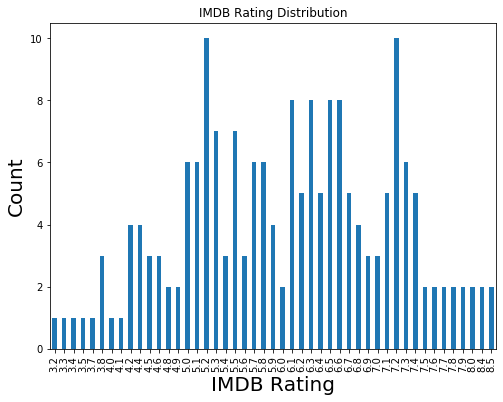

In [88]:
#Creating IMDB rating distrubtion from all data sources which includes all netflix and website data
Ratings_Netflix_Counts=Ratings['imdbRating'].value_counts().sort_index()
Ratings_Netflix_Counts_Plot = Ratings_Counts.plot.bar(title='IMDB Rating Distribution', figsize=(8,6))
Ratings_Netflix_Counts_Plot.set_xlabel('IMDB Rating',size=20)
Ratings_Netflix_Counts_Plot.set_ylabel('Count',size=20)

In [89]:
#Creating a distributor dataframe where we are grabbing all rows where distributor isn't Null and the netflix date added isn't null
Distributor_Netflix = pd.read_sql('select * from Movies WHERE Date_Added_Netflix IS NOT NULL and Distributor IS NOT NULL', con)
Distributor_Netflix.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-
1,The Hurricane Heist,Rob Cohen,United States,"September 26, 2018",5.1,103 min,"$6,115,825",Entertainment Studios Motion Pictures,2018.0,PG-13,-
2,A Wrinkle in Time,Ava DuVernay,United States,"September 25, 2018",4.2,110 min,"$100,478,608",Walt Disney Studios Motion Pictures,2018.0,PG,-
3,Class Rank,Eric Stoltz,United States,"September 18, 2018",None,103 min,"$10,452",Cinedigm Entertainment Group,2018.0,None,-
4,Like Arrows,Kevin Peeples,United States,"May 6, 2019",6.2,99 min,"$817,990",Fathom Events,2018.0,Not Rated,-


In [90]:
Distributor_Netflix.shape #There are 33 movies that are on netflix which had distributor information from the website source

(33, 11)

Text(0, 0.5, 'Count')

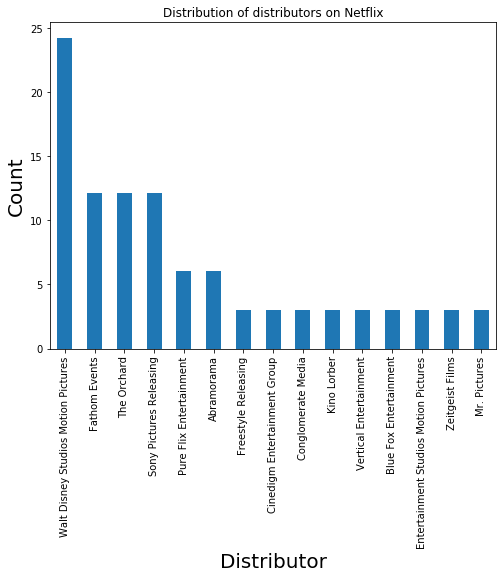

In [91]:
#Creating plot of distribution of distributors on netflix
Distributer=Distributor_Netflix['Distributor'].value_counts(normalize=True) * 100 
Distributers_plot = Distributer.plot.bar(title='Distribution of distributors on Netflix', figsize=(8,6))
Distributers_plot.set_xlabel('Distributor',size=20)
Distributers_plot.set_ylabel('Count',size=20)
#Graph below shows near 25% of the movies were distributed by Walt Disney

In [117]:
#Creating a Rated dataframe where we are grabbing all rows where Rated isn't Null and the netflix date added isn't null
RatedNetflix = pd.read_sql('select * from Movies WHERE Date_Added_Netflix IS NOT NULL and Rated IS NOT NULL', con)
RatedNetflix.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,Next Gen,"Kevin R. Adams, Joe Ksander","China, Canada, United States","September 7, 2018",6.6,106 min,None,None,2018.0,TV-PG,None
1,The Most Assassinated Woman in the World,Franck Ribière,"Belgium, United Kingdom, United States","September 7, 2018",5.3,102 min,None,None,2018.0,TV-MA,None
2,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-
3,The Debt Collector,Jesse V. Johnson,"United Kingdom, United States","September 3, 2018",5.7,96 min,None,None,2018.0,Not Rated,None
4,Hold the Dark,Jeremy Saulnier,United States,"September 28, 2018",5.6,126 min,None,None,2018.0,TV-MA,None


In [118]:
RatedNetflix.shape #There are 143 movies that are on netflix which had Rated information

(143, 11)

In [119]:
value_rated=RatedNetflix['Rated'].value_counts(sort=True) #going to see the distribution of the rated types
value_rated

TV-MA        54
TV-14        21
PG           15
PG-13        14
Not Rated    12
R            11
TV-PG         9
Unrated       3
TV-Y7         2
G             1
Approved      1
Name: Rated, dtype: int64

In [120]:
RatedNetflix['Rated']= RatedNetflix['Rated'].replace({'Unrated':'Not Rated'}) #going to replace unrated to not rated

In [122]:
value_rated2=RatedNetflix['Rated'].value_counts(sort=True)
value_rated2#checking to see if the replace worked, which it did

TV-MA        54
TV-14        21
Not Rated    15
PG           15
PG-13        14
R            11
TV-PG         9
TV-Y7         2
G             1
Approved      1
Name: Rated, dtype: int64

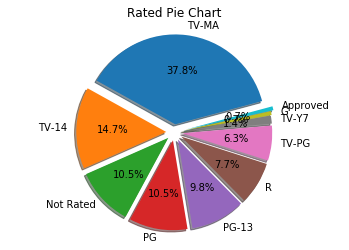

In [138]:
Rated_pie = RatedNetflix['Rated'].value_counts()#choosing the data in the Rated column to graph
my_labels1 = 'TV-MA','TV-14','Not Rated','PG','PG-13 ','R','TV-PG', 'TV-Y7','G','Approved'
my_explode = (0.09, 0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.10,0.13)
plt.pie(Rated_pie,labels=my_labels1,autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.title('Rated Pie Chart')
plt.axis('equal')
plt.show()
#graph shows the rated percentages among the content in netflix

In [139]:
#Creating a distributor dataframe where we are grabbing all rows where Gross isn't Null and the netflix date added isn't null
GrossNetflix = pd.read_sql('select * from Movies WHERE Date_Added_Netflix IS NOT NULL and Gross IS NOT NULL', con)
GrossNetflix.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-
1,The Hurricane Heist,Rob Cohen,United States,"September 26, 2018",5.1,103 min,"$6,115,825",Entertainment Studios Motion Pictures,2018.0,PG-13,-
2,A Wrinkle in Time,Ava DuVernay,United States,"September 25, 2018",4.2,110 min,"$100,478,608",Walt Disney Studios Motion Pictures,2018.0,PG,-
3,Class Rank,Eric Stoltz,United States,"September 18, 2018",None,103 min,"$10,452",Cinedigm Entertainment Group,2018.0,None,-
4,Like Arrows,Kevin Peeples,United States,"May 6, 2019",6.2,99 min,"$817,990",Fathom Events,2018.0,Not Rated,-


In [140]:
GrossNetflix.shape

(33, 11)

In [145]:
#now going to remove special characters from the Gross column
spec_chars1 = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","$"]
for char in spec_chars1:
 GrossNetflix['Gross']=GrossNetflix['Gross'] = GrossNetflix['Gross'].str.replace(char, ' ')
GrossNetflix['Gross'].head() #now looking at the Gross column there is a space where there there used to be a comma

0     700 059 566
1       6 115 825
2     100 478 608
3          10 452
4         817 990
Name: Gross, dtype: object

In [147]:
# splitting each value in Gross using whitespaces and re-joining them again using join
GrossNetflix['Gross'] = GrossNetflix['Gross'].str.split().str.join("") 
GrossNetflix.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,700059566,Walt Disney Studios Motion Pictures,2018.0,PG-13,-
1,The Hurricane Heist,Rob Cohen,United States,"September 26, 2018",5.1,103 min,6115825,Entertainment Studios Motion Pictures,2018.0,PG-13,-
2,A Wrinkle in Time,Ava DuVernay,United States,"September 25, 2018",4.2,110 min,100478608,Walt Disney Studios Motion Pictures,2018.0,PG,-
3,Class Rank,Eric Stoltz,United States,"September 18, 2018",None,103 min,10452,Cinedigm Entertainment Group,2018.0,None,-
4,Like Arrows,Kevin Peeples,United States,"May 6, 2019",6.2,99 min,817990,Fathom Events,2018.0,Not Rated,-


In [148]:
GrossNetflix['Gross'] = GrossNetflix['Gross'].apply(pd.to_numeric) #Using apply to change Gross to numerical values

In [151]:
Sorted_Gross = GrossNetflix.sort_values('Gross',ascending=False)#now sorting the movies from the highest to lowest Gross Sales
Sorted_Gross.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,700059566,Walt Disney Studios Motion Pictures,2018.0,PG-13,-
25,Avengers: Infinity War,"Anthony Russo, Joe Russo",United States,"December 25, 2018",8.5,150 min,678815482,Walt Disney Studios Motion Pictures,2018.0,PG-13,-
18,Ant-Man and the Wasp,Peyton Reed,United States,"January 29, 2019",7.1,118 min,216648740,Walt Disney Studios Motion Pictures,2018.0,PG-13,-
17,Solo: A Star Wars Story,Ron Howard,United States,"January 9, 2019",6.9,135 min,213767512,Walt Disney Studios Motion Pictures,2018.0,PG-13,-
11,Spider-Man: Into the Spider-Verse,"Peter Ramsey, Rodney Rothman, Bob Persichetti",United States,"June 26, 2019",8.4,117 min,190241310,Sony Pictures Releasing,2018.0,PG,-


In [153]:
#Going to do a Pivot Table to get the sum of the gross sales per distributor from the movies on Netflix
pivot_gross=pd.pivot_table(data=Sorted_Gross, index='Distributor', values='Gross',aggfunc='sum').reset_index().rename(columns={'Gross': 'Gross_Sales'} )
pivot_gross

,Distributor,Gross_Sales
0,Abramorama,26045
1,Blue Fox Entertainment,89988
2,Cinedigm Entertainment Group,10452
3,Conglomerate Media,147175
4,Entertainment Studios Motion Pictures,6115825
5,Fathom Events,2130927
6,Freestyle Releasing,2846257
7,Kino Lorber,158646
8,Mr. Pictures,11257
9,Pure Flix Entertainment,10448868


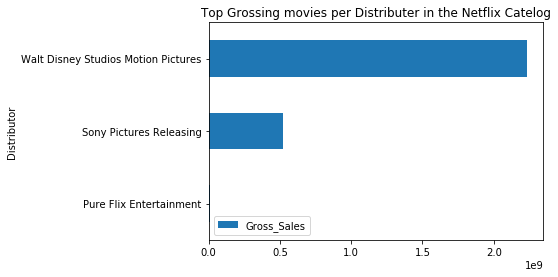

In [166]:
Topgross=pivot_gross.loc[pivot_gross['Gross_Sales']>10000000]
Topgross.plot.barh(x='Distributor', y='Gross_Sales', title="Top Grossing movies per Distributer in the Netflix Catelog");

plt.show(block=True)



In [169]:
#Creating new dataframe by selecting all rows from SQL where movie duration is not null, netflix is not null, and IMDBrating is not Null
Durations = pd.read_sql('select * from Movies WHERE Duration IS NOT NULL and Date_Added_Netflix IS NOT NULL and imdbRating is not NUll', con)
Durations.head()

,Movie_Title,Director,Country,Date_Added_Netflix,imdbRating,Duration,Gross,Distributor,Release_Year,Rated,Genre
0,Next Gen,"Kevin R. Adams, Joe Ksander","China, Canada, United States","September 7, 2018",6.6,106 min,None,None,2018.0,TV-PG,None
1,The Most Assassinated Woman in the World,Franck Ribière,"Belgium, United Kingdom, United States","September 7, 2018",5.3,102 min,None,None,2018.0,TV-MA,None
2,Black Panther,Ryan Coogler,United States,"September 4, 2018",7.3,135 min,"$700,059,566",Walt Disney Studios Motion Pictures,2018.0,PG-13,-
3,The Debt Collector,Jesse V. Johnson,"United Kingdom, United States","September 3, 2018",5.7,96 min,None,None,2018.0,Not Rated,None
4,Hold the Dark,Jeremy Saulnier,United States,"September 28, 2018",5.6,126 min,None,None,2018.0,TV-MA,None


Text(0, 0.5, 'Count')

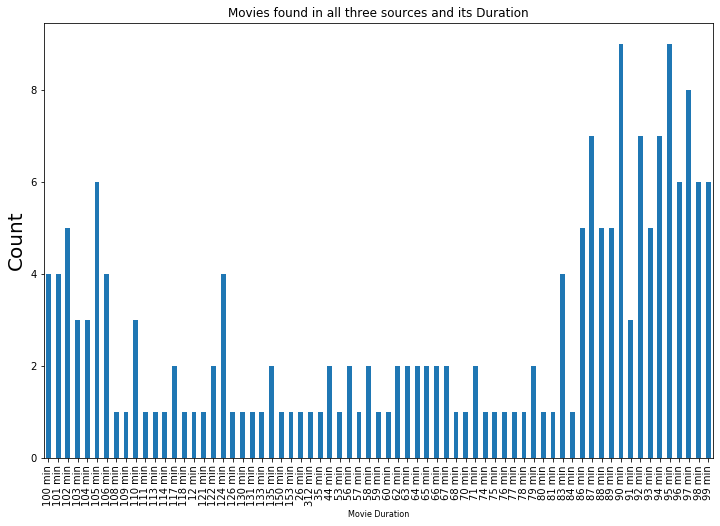

In [179]:
#Creating plot of distributions of movie duration
Movie_Duration=Durations['Duration'].value_counts().sort_index()
Movie_Duration_Plot = Movie_Duration.plot.bar(title='Movies found in all three sources and its Duration', figsize=(12,8))
Movie_Duration_Plot.set_xlabel('Movie Duration',size=8)
Movie_Duration_Plot.set_ylabel('Count',size=20)

Summary

I found this final project for this term very interesting, and I believe I learned a lot in this class. I was able to build on my data analytical skills this term with python. I found most exciting to learn how to web scrape data, and how to read json by utilizing an API. This term I was able to find a dataset from Kaggle, which had Netflix content data. I was excited about this dataset because of all the exploratory analysis that could be done with this. For the website data analysis portion, I decided to go with the top grossing movies from 2018 presented by the boxofficemojo.com, and used Beautiful Soup to scrape the data. I was also excited to find the open movie database api service which I utilized to get the ratings of the movies. 

After cleaning up all the three data sources, I was able to merge all three sources by doing a outer join on the Title of the movie. Following the merging of the data, I was able to successfully create query to create the movies table using SQLLite and create a database that housed my data. Going forward I saw that I was able to read the sql data, and convert it to a dataframe for further analysis. Using python I create 5 visualizations to get better insight of the data acquired from the three sources. 

Some of notable insights I found was that the Netflix data showed to have more Movies then TV shows in their catalog. After utilizing the merged data I had in my movies database, I was able to link the title of the Movie from Netflix, and the IMBD rating from the API source, which showed that the movies where all over the board, and with the majority of the movies being around a rating of 5 to 7. Another insight that I was able to gather is that the website data had the distributor information, so I was interested in seeing which distributor had the most movies from there on Netflix with a release year of 2018, and looking at the graph I can see that Walt Disney Studios beat out the competition. I was curious to see the rating distribution of the 2018 movies in Netflix, which after doing the pie chart I saw that almost 38% of the content was rated TV-MA, and then followed by TV-14 around 15%. Following that I looked at the gross sales data I got from the website, and correlated that with the movies on Netflix, and looking at the graph I can see had the top grossing movies on Netflix came from Walt Disney Studios, and secondly followed by Sony Pictures. I also looked at the movie duration time, and saw that most movies were around 90-100 mins long. 
